In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [65]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
EPOCHS = 30

In [66]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "images",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
    
)

Found 332 files belonging to 3 classes.


In [67]:
class_names = dataset.class_names

n_classes = len(class_names)
n_classes

3

In [68]:
class_names

['level1', 'level2', 'level3']

In [69]:
len(dataset)

11

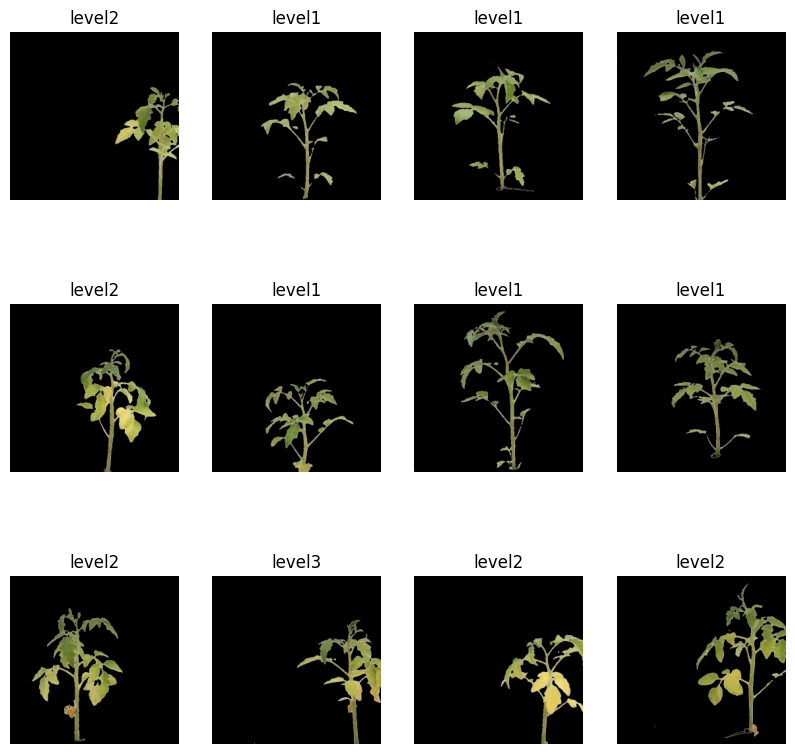

In [70]:
plt.figure(figsize=(10,10))

for image_batch,label_batch in  dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")


In [71]:
training_size = 0.8
len(dataset)*training_size

8.8

In [72]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split = 0.1,shuffle=True,shuffle_size = 10000):
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds =ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds

In [73]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [74]:
len(train_ds)

8

In [75]:
len(val_ds)

1

In [76]:
len(test_ds)

2

In [77]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [78]:
resize_and_rescale = tf.keras.Sequential([
layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
layers.experimental.preprocessing.Rescaling(1.0/255),
])

In [79]:
data_augmentation = tf.keras.Sequential([
layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
layers.experimental.preprocessing.RandomRotation(2.0),
])

In [80]:
CHANELS = 3
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANELS)
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation="relu",input_shape =input_shape ),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size =(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size =(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),  
])

model.build(input_shape=input_shape)

In [81]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_7 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_12 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPooli  (32, 127, 127, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (32, 62, 62, 64)          0         
 ng2D)                                                

In [82]:
model.get_config()

{'name': 'sequential_8',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (32, 256, 256, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'sequential_6_input'},
   'registered_name': None},
  {'module': 'keras',
   'class_name': 'Sequential',
   'config': {'name': 'sequential_6',
    'layers': [{'module': 'keras.layers',
      'class_name': 'InputLayer',
      'config': {'batch_input_shape': (32, 256, 256, 3),
       'dtype': 'float32',
       'sparse': False,
       'ragged': False,
       'name': 'resizing_2_input'},
      'registered_name': None},
     {'module': 'keras.layers',
      'class_name': 'Resizing',
      'config': {'name': 'resizing_2',
       'trainable': True,
       'dtype': 'float32',
       'height': 256,
       'width': 256,
       'interpolation': 'bilinear',
       'crop_to_aspect_ratio': False},
      'registered_name': None,
      'build_config': {'input_shape': (32, 256, 2

In [83]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy']
              )


In [84]:
history = model.fit(train_ds,
         epochs=EPOCHS,
         batch_size = BATCH_SIZE,
         verbose =1,
         validation_data=val_ds)

Epoch 1/30
8/8 [==============================] - 7s 637ms/step - loss: 1.0207 - accuracy: 0.5547 - val_loss: 0.8912 - val_accuracy: 0.6250
Epoch 2/30
8/8 [==============================] - 5s 583ms/step - loss: 0.9158 - accuracy: 0.6328 - val_loss: 0.8334 - val_accuracy: 0.6250
Epoch 3/30
8/8 [==============================] - 5s 582ms/step - loss: 0.9056 - accuracy: 0.6328 - val_loss: 0.8943 - val_accuracy: 0.6250
Epoch 4/30
8/8 [==============================] - 5s 607ms/step - loss: 0.9185 - accuracy: 0.6328 - val_loss: 0.8107 - val_accuracy: 0.6250
Epoch 5/30
8/8 [==============================] - 5s 579ms/step - loss: 0.8779 - accuracy: 0.6328 - val_loss: 0.8183 - val_accuracy: 0.6250
Epoch 6/30
8/8 [==============================] - 5s 602ms/step - loss: 0.8631 - accuracy: 0.6328 - val_loss: 0.7991 - val_accuracy: 0.6250
Epoch 7/30
8/8 [==============================] - 5s 590ms/step - loss: 0.8479 - accuracy: 0.6328 - val_loss: 0.7931 - val_accuracy: 0.6250
Epoch 8/30
8/8 [====

In [85]:
scores = model.evaluate(test_ds)

2/2 [==============================] - 0s 133ms/step - loss: 0.4760 - accuracy: 0.8750


In [86]:
scores

[0.4760083556175232, 0.875]

In [87]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [88]:
history

In [89]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


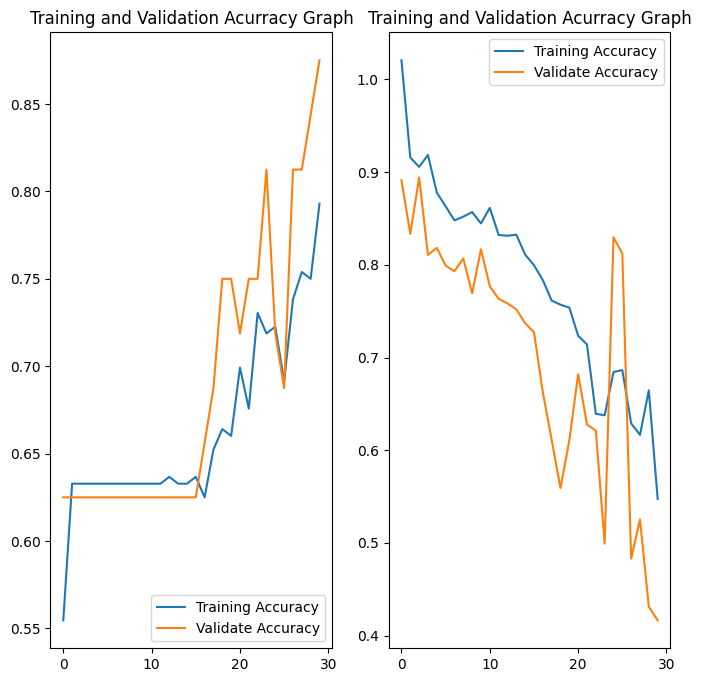

In [90]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc ,label = 'Training Accuracy')
plt.plot(range(EPOCHS),val_acc ,label = 'Validate Accuracy')
plt.legend(loc="lower right")
plt.title("Training and Validation Acurracy Graph")


plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss ,label = 'Training Accuracy')
plt.plot(range(EPOCHS),val_loss ,label = 'Validate Accuracy')
plt.legend(loc="upper right")
plt.title("Training and Validation Acurracy Graph")
plt.show()

first image to predict
actual label: level1
1/1 [==============================] - 0s 236ms/step
predict label: level1


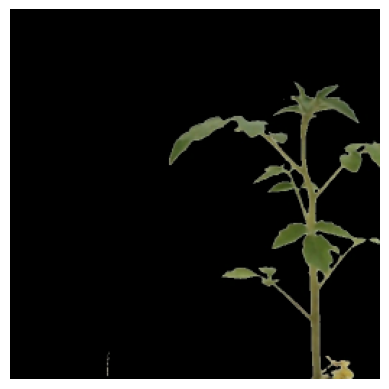

In [91]:
import numpy as np
for images_batch,labels_batch in test_ds.take(1):
    first_image =images_batch[0].numpy().astype("uint8")
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    

    batch_prediction = model.predict(images_batch)        
    print("predict label:",class_names[np.argmax(batch_prediction[0])])
    plt.axis("off")

In [92]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array,0)

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 [==============================] - 0s 21ms/step


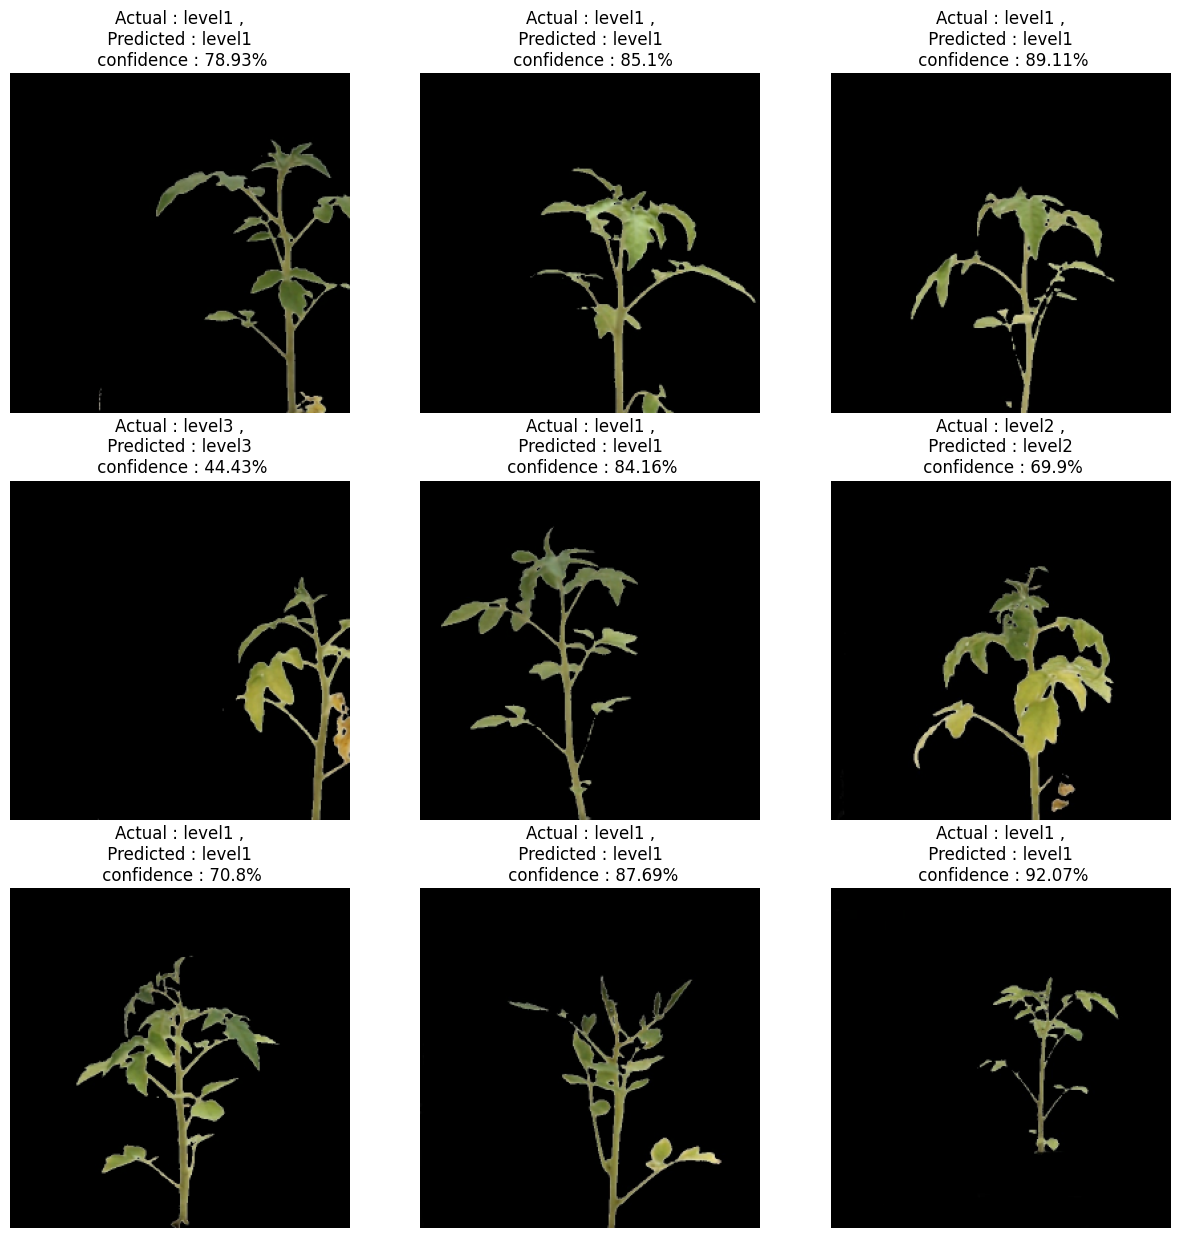

In [93]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class ,confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual : {actual_class} ,\n Predicted : {predicted_class} \n confidence : {confidence}%")
        
        plt.axis("off")

In [94]:
batch_prediction

array([[0.78933287, 0.16250436, 0.04816279],
       [0.85098857, 0.11284283, 0.03616855],
       [0.89112055, 0.08635336, 0.022526  ],
       [0.35419083, 0.20152016, 0.444289  ],
       [0.8415588 , 0.13882007, 0.01962113],
       [0.17286818, 0.69903564, 0.12809616],
       [0.7080139 , 0.1858376 , 0.10614853],
       [0.8769313 , 0.08499557, 0.03807314],
       [0.9207296 , 0.07557611, 0.00369427],
       [0.11466425, 0.65565133, 0.22968447],
       [0.7635776 , 0.20616762, 0.03025482],
       [0.5004956 , 0.30746645, 0.19203791],
       [0.92826927, 0.06763697, 0.00409371],
       [0.93822336, 0.05547555, 0.0063011 ],
       [0.2097082 , 0.41778615, 0.37250564],
       [0.9673735 , 0.02726584, 0.0053607 ],
       [0.09594652, 0.7974923 , 0.10656121],
       [0.6375669 , 0.1744105 , 0.18802251],
       [0.97564894, 0.02203603, 0.00231506],
       [0.7318674 , 0.12014473, 0.14798787],
       [0.6553815 , 0.2654443 , 0.07917424],
       [0.9280457 , 0.05473968, 0.01721467],
       [0.

In [96]:
import os

lastest_version =max([int(i) for i in os.listdir("../models/phenotype") + [0]]) + 1

In [97]:
model_version = lastest_version
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets
